In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statistics
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
X_train = pd.read_csv("Bases/base_xtrain.csv")
X_test = pd.read_csv("Bases/base_xtest.csv")
y_train = pd.read_csv("Bases/base_ytrain.csv")
y_test = pd.read_csv("Bases/base_ytest.csv")

In [7]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [9]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=3)
modelo2 = RandomForestClassifier(n_estimators=30, max_depth=5, max_features="sqrt")
rede_neural = MLPClassifier(solver='adam', hidden_layer_sizes=(20, 10), alpha=1e-4, max_iter=200, random_state=1)
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1), n_estimators=10, random_state=1)
naive = GaussianNB()
scoresAD = cross_val_score(modelo, X_train, y_train, cv=kf)
scoresRF = cross_val_score(modelo2, X_train, y_train, cv=kf)
scoresNY = cross_val_score(naive, X_train, y_train, cv=kf)
scoresBG = cross_val_score(bagging, X_train, y_train, cv=kf)
scoresRNA = cross_val_score(rede_neural, X_train, y_train, cv=kf)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

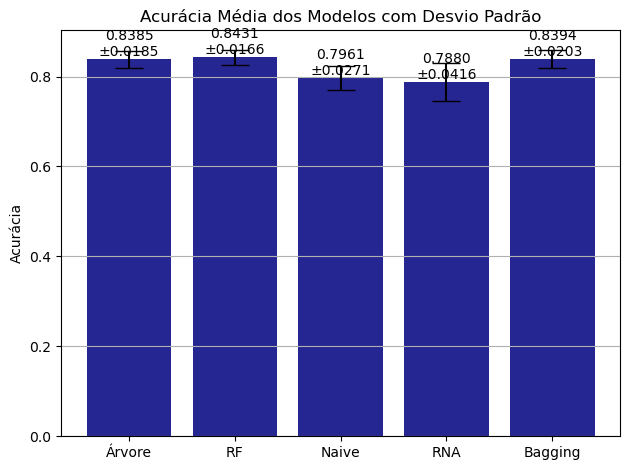

In [10]:
# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive', 'RNA', 'Bagging']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY, scoresRNA, scoresBG]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()